## Observations and Insights 

In [376]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(study_results,mouse_metadata, how = 'left', on= "Mouse ID")
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
#Checking number of entries
len(study_data)

1893

In [24]:
# Checking the number of mice in the DataFrame.
mice_count = study_data['Mouse ID'].nunique()
mice_count

249

In [375]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_clean = study_data.drop_duplicates(['Mouse ID','Timepoint'])
study_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [378]:
#Generate mean, median, variance, standard deviation, and standard error 
avg_tumor = round(study_data_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'],2)
median_tumor = round(study_data_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)'],2)
var_tumor = round(study_data_clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)'],2)
stDev_tumor = round(study_data_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)'],2)
sem_tumor = round(study_data_clean.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2)

#Create a table with the above summary statistics

drug_summary = pd.concat([avg_tumor,median_tumor,var_tumor,stDev_tumor,sem_tumor], axis = 1)
drug_summary.columns = ['Average Tumor Volume', 'Median Tumor Volume', 'Variance of Tumor Volume', 
                        'Standard Deviation of Tumor Volume', 'Standard Error of Tumor Volume']
drug_summary

,Average Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,Standard Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [379]:
#ALTERNATE and definitely more involved way to calculate SEM, saving for future reference 

# def SEMCalc (treatment):
#         mask = study_data_clean['Drug Regimen'] == treatment
#         sem_data = study_data_clean.loc[mask]
#         drug_sem = st.sem(sem_data['Tumor Volume (mm3)'])
#     #capomulin_timept.plot(kind = "bar")

# for treatment in study_data_clean['Drug Regimen'].unique(): 
#     SEMs = SEMCalc(treatment)
#     SEMs

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

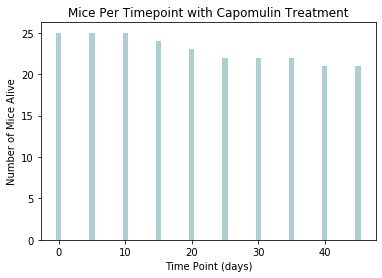

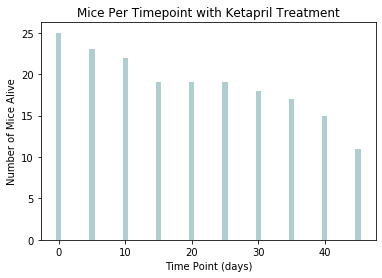

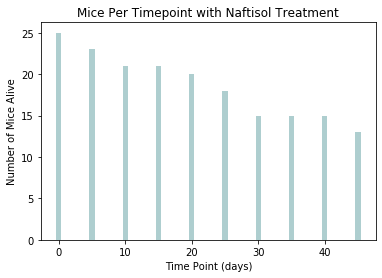

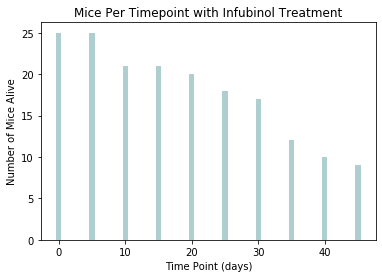

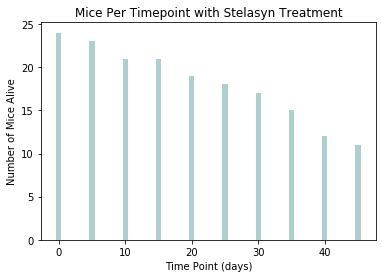

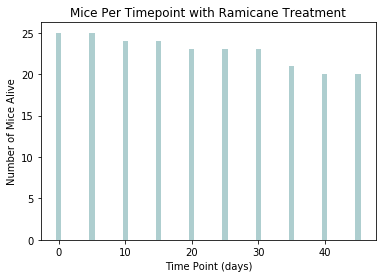

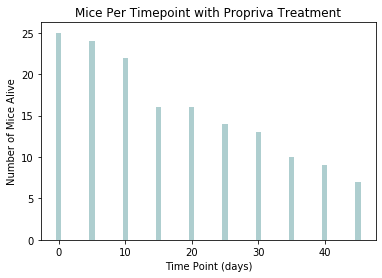

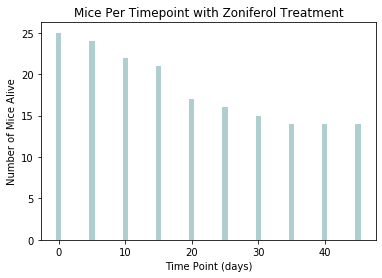

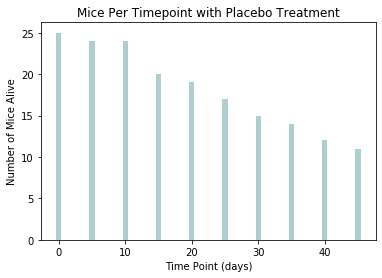

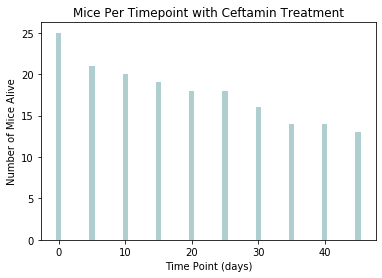

In [35]:
#find the data for Capomulin over each time point and then plot onto bar graph THEN generalize it into a function

#function to group by treatment, extract timepoint data, and graph the data
def MiceBar(treatment):
        #groupby the treatment and return rows for each treatment
        mask = study_data_clean['Drug Regimen'] == treatment
        drug_data = study_data_clean.loc[mask]
        
        #get the number of mouse alive at each timepoint and sort from largest to smallest 
        drug_timept = drug_data.Timepoint.value_counts().sort_values(ascending = False)

        #let the index (timepoint) be the x values, and let the values of the series be the y values
        x_axis = drug_timept.index
        y_values = drug_timept.values
        
        #plot the bar graph 
        plt.bar(x_axis, y_values, color='cadetblue', alpha=0.5, align="center")
        plt.title(f"Mice Per Timepoint with {treatment} Treatment")
        plt.xlabel("Time Point (days)")
        plt.ylabel("Number of Mice Alive")

#iterate through each treatment in the data set
for treatment in study_data_clean['Drug Regimen'].unique(): 
    MiceBar(treatment)
    plt.show()

## Pie Plots

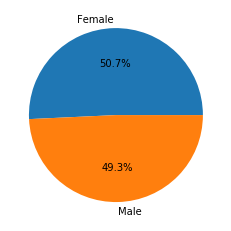

In [229]:
#get the labels for sex by retrieving the unique values
sex_labels = study_data_clean.Sex.unique()

#get the pivot table equivalent for sex 
sex_values = study_data_clean.Sex.value_counts()

#plot as pie chart and include percentages
plt.pie(sex_values, labels = sex_labels, autopct= '%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

There are no potential outliers for ['Placebo', 'Capomulin', 'Ramicane', 'Propriva']


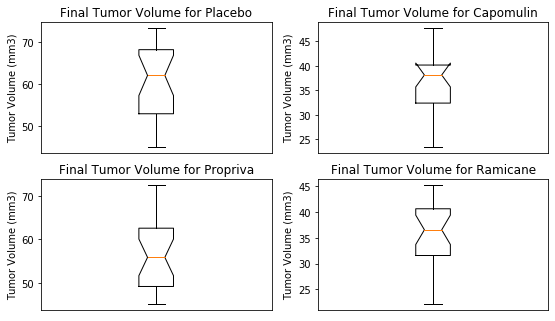

In [392]:
#get dataframe with max timepoints for each mice - not every one will be 45 days. 
max_timept = pd.DataFrame(study_data_clean.groupby("Mouse ID").max()['Timepoint']).reset_index()

#merge the full data set to the df with unique mouse-id's to get the corresponding tumor volume
max_vol_df = pd.merge(max_timept, study_data_clean[['Mouse ID','Tumor Volume (mm3)', 'Drug Regimen', 'Timepoint']], 
         on = ['Mouse ID','Timepoint'], how = 'left')

#Get data for four of the treatments (Placebo, Capomulin, Ramicane, and Propriva)

top_drugs = ['Placebo', 'Capomulin', 'Ramicane','Propriva']
max_list = []
for drug in top_drugs:
    max_list.append(drug)
    vals = max_vol_df.loc[max_vol_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'].values
    max_list.append(vals)
    
#Given the values for final tumor volume, calculate the median then calc Q1 and Q3. Calc IQR and find bounds. 
#Since drug names are also printed in the 'max_list' variable, need to grab odd indexes only - could have also used 
    #modulo to get the odd numbers rather than the list
nums = [1,3,5,7]
outliers = []
for index in nums: 
    median = np.median(max_list[index])
    Q1 = np.quantile(max_list[index],.25)
    Q3 = np.quantile(max_list[index],.75)
    IQR = Q3-Q1
    up_bound = 1.5*IQR + Q3
    low_bound = Q1 - 1.5*IQR
    #if there is an outlier, print it to the outliers set
    for x in max_list[index]: 
        if x > up_bound or x < low_bound:
            outliers.append(x)
    #to differentiate between treatments, print 'next drug' if there are outliers
    if outliers != []: 
        outliers.append('next drug')
        
#if there aren't outliers, let us know 
if outliers == []: 
    print(f'There are no potential outliers for {top_drugs}')

#Plot each list of datapoints in four subplots - quadrant style 
figs, axs = plt.subplots(2,2)
axs[0,0].set_title('Final Tumor Volume for Placebo')
axs[0,0].boxplot(max_list[1], notch = True)

axs[0,1].set_title('Final Tumor Volume for Capomulin')
axs[0,1].boxplot(max_list[3], notch = True)

axs[1,1].set_title('Final Tumor Volume for Ramicane')
axs[1,1].boxplot(max_list[5], notch = True)

axs[1,0].set_title('Final Tumor Volume for Propriva')
axs[1,0].boxplot(max_list[7], notch = True)

#Same y labels, so iterate the assignment of labels
for ax in axs.flat:
    ax.set(ylabel='Tumor Volume (mm3)')
    ax.xaxis.set_visible(False)

#adjust the spacing between the sub-plots so everything is legible    
plt.subplots_adjust(left=.125, bottom=.1, right=1.3, top=1.1, wspace=0.2, hspace=.2)

#go back and use a for loop to define the tumor volume columns for each drug
plt.show()

## Line and Scatter Plots

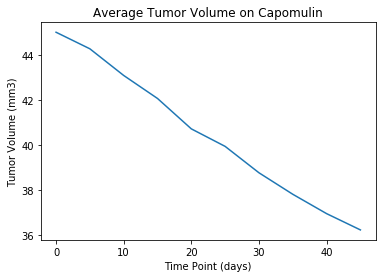

In [390]:
# Find all rows for mice treated with Capomulin. Then group by the time point and find 
    #the average tumor volume at each timepoint
    
tumor_time = study_data_clean.loc[study_data_clean['Drug Regimen'] == 
                     'Capomulin'].groupby('Timepoint').mean()['Tumor Volume (mm3)']

#plot
plt.plot(tumor_time.index,tumor_time.values)
plt.title("Average Tumor Volume on Capomulin")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

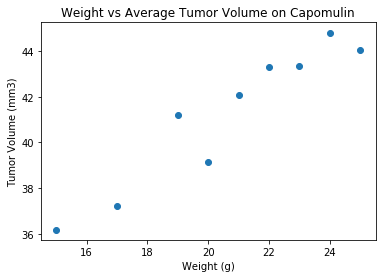

In [391]:
# Find all rows for mice treated with Capomulin. Then group by their weights and find 
    #the average tumor volume at each weight
tumor_values = study_data_clean.loc[study_data_clean['Drug Regimen'] == 'Capomulin'].groupby(
    "Weight (g)").mean()['Tumor Volume (mm3)']

#Plot the data in a scatter plot
plt.scatter(tumor_values.index, tumor_values.values)
plt.title("Weight vs Average Tumor Volume on Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient is 0.951, which implies a strong positive correlation between weight and tumor volume
The r-squared is: 0.904, which indicates that 90.44% of the variation in tumor volume can be explained by the linear regression model


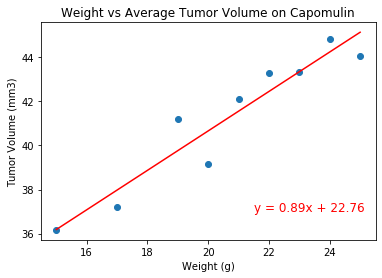

In [389]:
#Run a linear regression analysis on the weight(index) and tumor volume (values)
regress = linregress(tumor_values.index, tumor_values.values)

#Pull the correlation coeffiecient from the regression analysis output
corr = round(regress.rvalue,3)
print(f'The correlation coefficient is {corr}, which implies a strong positive correlation ' 
      'between weight and tumor volume')

#Generate expected values for tumor volume using the regression model
regress_vals = tumor_values.index * regress.slope + regress.intercept

#Generate regression equation
regress_eq = "y = " + str(round(regress.slope,2)) + "x + " + str(round(regress.intercept,2))

#Re-plot the scatter plot and add in the regression equation and line 
plt.scatter(tumor_values.index, tumor_values.values)
plt.plot(tumor_values.index,regress_vals,"r-")
plt.annotate(regress_eq,(21.5,37),fontsize=12,color="red")
plt.title("Weight vs Average Tumor Volume on Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f'The r-squared is: {round(corr**2,3)}, which indicates that {round((corr**2)*100,2)}% of the variation in tumor volume '
      'can be explained by the linear regression model')
plt.show()